<a href="https://colab.research.google.com/github/tvpian/NERF_Series/blob/main/NERF_Series_01_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
def simulator(x, t=3):

    x0, v0 = x[:2], x[2:]

    a = torch.tensor([0, -9.81])
    v = v0 + a * t
    x = x0 + v0 * t + .5 * a * t**2

    return torch.cat((x, v))

In [3]:
# Replicating a scenario where an object is thrown from a initial position with
# a non-zero velocity

x0 = torch.tensor([0.0, 0.0])
v0 = torch.tensor([10.0, 10.0])
x = torch.cat((x0, v0))
b = simulator(x, t=3)

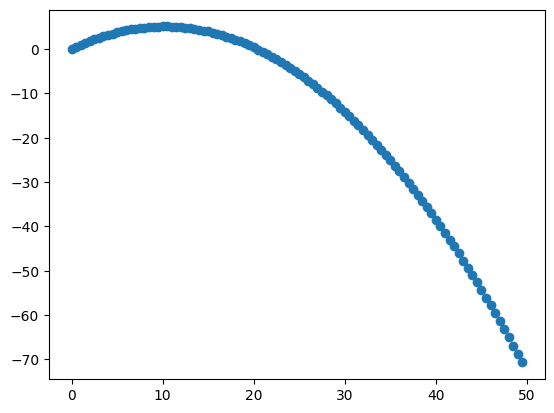

In [4]:
all_pos = []
for t in range(100):
    y = simulator(x, t=t/20)
    all_pos.append(y[:2])
all_pos = np.array(all_pos)
plt.scatter(all_pos[:, 0], all_pos[:, 1])
plt.show()

\begin{equation}
\arg \min_x\|A(x) - b\|_2^2
\end{equation}
x -  It is the NERF model we wish to optimize

A - the model that can simulate how the pictures taken from a camera or phone would look like.

b - Actual image taken by a camera or phone



Case 1

In [5]:
x = torch.tensor([0.0, 0.0, 0.0, 0.0], requires_grad=True)
optimizer = torch.optim.SGD({x}, lr=0.01)
training_loss = []

for epoch in range(200):
 Ax = simulator(x, t = 3)
 loss = ((Ax - b)**2).mean()
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()
 training_loss.append(loss.item())
#  print(loss.item())

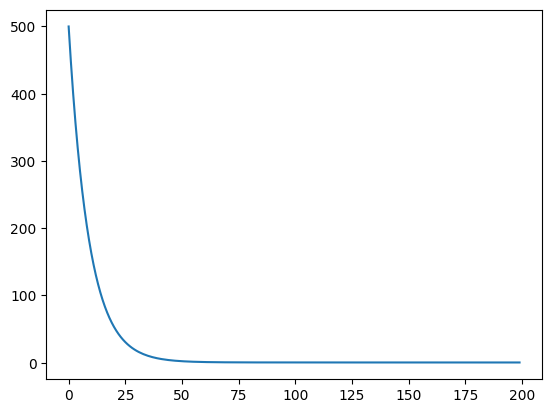

In [6]:
plt.plot(training_loss)
plt.show()

# Camera Model

In [7]:
import numpy as np

In [9]:
H = 400
W = 400
f = 1200

In [25]:
# Defing the camera model

rays_o = np.zeros((H, W, 3)) # Vector array to store the position of each pixel on the image plane
rays_d = np.zeros((H, W, 3)) # Vector array to store the direction of the rays intersecting each pixel

# Defining the image plane
u =  np.arange(W)
v = np.arange(H)
u, v = np.meshgrid(u, v) # Creating a meshgrid based on the value of u,v - This is a way to represent each pixel location with 2D coordinate system

# Representing the image plane in the camera coordinate frame
dirs = np.stack((u-W/2, -(v-H/2), -np.ones_like(u) * f), axis=-1) # Representing the image plane wrt to the camera coordinate frame

rays_d = dirs/ np.linalg.norm(dirs, axis=-1, keepdims=True) # Normalizing the direction of the rays wrt to last axis(dividing all elements by f)

## By doing the above we are simulating the scenario where the rays are coming from the camera optical center to the objects

In [23]:
u.shape, v.shape, rays_d.shape

((400, 400), (400, 400), (400, 400, 3))

In [22]:
dirs[0, 0], rays_d[0, 0]

(array([ -200.,   200., -1200.]),
 array([-0.16222142,  0.16222142, -0.97332853]))

In [15]:
print(u), print(v)

[[  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 ...
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [397 397 397 ... 397 397 397]
 [398 398 398 ... 398 398 398]
 [399 399 399 ... 399 399 399]]


(None, None)